## Predict the probability of an employee leaving

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [2]:
dff = pd.read_csv('HR_comma_sep.csv')
dff.head(5)
dff.columns

Index(['satisfaction_level ', 'last_evaluation ', 'number_project ',
       'average_montly_hours ', 'time_spend_company ', 'Work_accident ',
       'left ', 'promotion_last_5years ', 'Department  ', 'salary'],
      dtype='object')

In [3]:
dff = pd.get_dummies(dff, columns=['Department', 'salary'], drop_first=True)


KeyError: "['Department'] not in index"

In [ ]:
dff.head(30)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
dff.to_csv('modified.csv',index=False)

In [ ]:
df = pd.read_csv('modified.csv')

<Axes: xlabel='number_project', ylabel='average_montly_hours'>

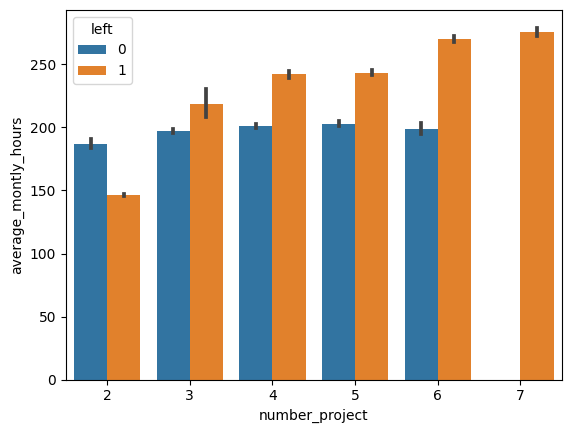

In [ ]:
sns.barplot(x='number_project', y='average_montly_hours', hue='left', data=df)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase the number of iterations
model = LogisticRegression(max_iter=10000)

# Fit the model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
model.predict(X_test_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
model.score(X_test_scaled, y_test)

0.7926666666666666

In [ ]:
model.predict([[0.8,0.13,5,100,4,1,1,1,0,0,0,0,0,1,0,0,1,0]])

array([1], dtype=int64)